<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [3]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [4]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [ ]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts


In [5]:
import pandas as pd

df = pd.read_csv('dataset.csv', header=0)

df.head()

<ipython-input-5-a84c8ce14481>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   transmission  17966 non-null  object 
 3   mileage       17966 non-null  int64  
 4   fuelType      17966 non-null  object 
 5   tax           17963 non-null  float64
 6   mpg           17966 non-null  float64
 7   engineSize    17966 non-null  float64
 8   price         17966 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.0+ MB


In [9]:
df['tax'] = df['tax'].fillna(df['tax'].mean())

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17812 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  object 
 1   year          17812 non-null  int64  
 2   transmission  17812 non-null  object 
 3   mileage       17812 non-null  int64  
 4   fuelType      17812 non-null  object 
 5   tax           17812 non-null  float64
 6   mpg           17812 non-null  float64
 7   engineSize    17812 non-null  float64
 8   price         17812 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.2+ MB


In [12]:
df.to_csv('new_dataset.csv', index=False)

In [13]:
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [17]:
df.describe()

,year,mileage,tax,mpg,engineSize,price
count,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000
mean,2016.862396,23381.146362,113.314731,57.908696,1.350623,12269.556310
std,2.052039,19419.011045,62.034599,10.132696,0.432581,4736.285417
min,1996.000000,1.000000,0.000000,20.800000,0.000000,495.000000
25%,2016.000000,10000.000000,30.000000,52.300000,1.000000,8999.000000
50%,2017.000000,18277.000000,145.000000,58.900000,1.200000,11288.000000
75%,2018.000000,31098.500000,145.000000,65.700000,1.500000,15295.000000
max,2060.000000,177644.000000,580.000000,201.800000,5.000000,54995.000000


In [20]:
float_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(float_columns)

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price'], dtype='object')


In [25]:
correlation = df[['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']].corr()['price'].abs().sort_values(ascending=False)
correlation

price         1.000000
year          0.635715
mileage       0.530483
engineSize    0.411451
tax           0.405970
mpg           0.346263
Name: price, dtype: float64

In [26]:
car_count_by_fuel_type = df['fuelType'].value_counts()
print(car_count_by_fuel_type)

fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


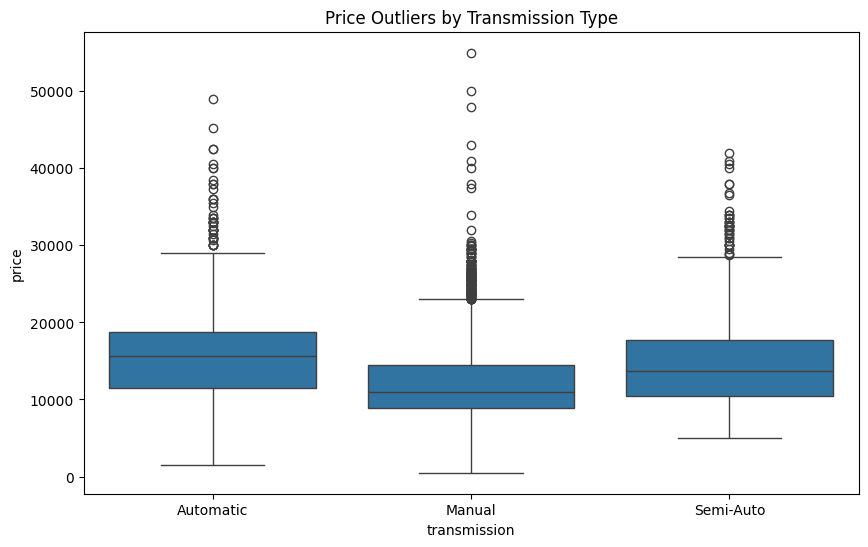

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Price Outliers by Transmission Type')
plt.show()

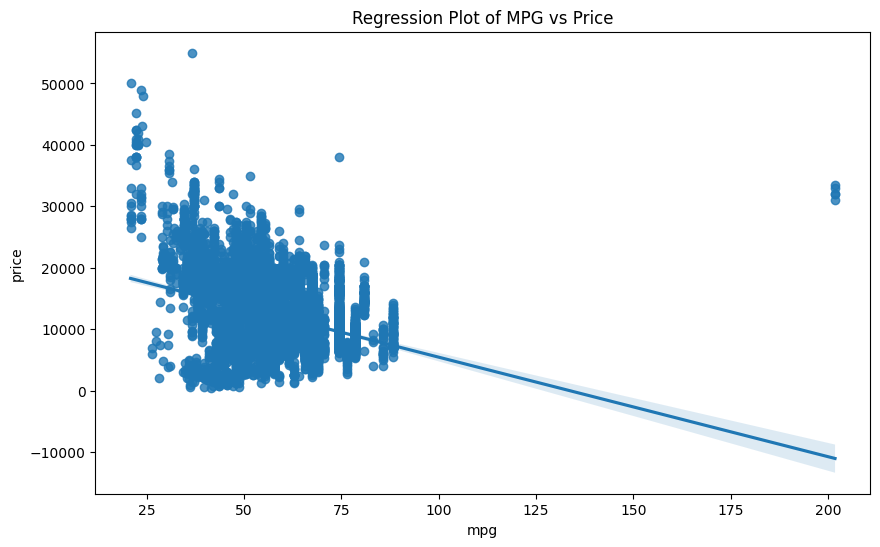

In [28]:
plt.figure(figsize=(10, 6))
sns.regplot(x='mpg', y='price', data=df)
plt.title('Regression Plot of MPG vs Price')
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create the linear regression model
X = df[['mpg']]
y = df['price']
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R^2 and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print("R^2:", r2)
print("MSE:", mse)

R^2: 0.1198980224962416
MSE: 19741690.809446193


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create the linear regression model
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R^2 and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print("R^2:", r2)
print("MSE:", mse)

R^2: 0.7265379654547005
MSE: 6134065.224381731


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Create the pipeline model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])

X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Fit the pipeline model
pipeline.fit(X, y)

# Make predictions
y_pred = pipeline.predict(X)

# Calculate R^2 and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print("R^2:", r2)
print("MSE:", mse)

R^2: 0.7666619695239302
MSE: 5234038.06546274


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Ridge regression model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 on test data:", r2)

R^2 on test data: 0.6917134446113138


In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Perform second-order polynomial transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit the Ridge regression model with polynomial features
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)

# Make predictions on the test set with polynomial features
y_pred_poly = ridge_poly.predict(X_test_poly)

# Calculate R^2 and MSE with polynomial features
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("R^2 with polynomial features:", r2_poly)
print("MSE with polynomial features:", mse_poly)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


R^2 with polynomial features: 0.6732748888228912
MSE with polynomial features: 7326174.516559619


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the set of alpha values
alphas = [0.01, 0.1, 1, 10, 100]

# Create the Ridge regression model
ridge = Ridge()

# Perform Grid Search with cross-validation
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=4)
grid_search.fit(X_train_poly, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best alpha value:", best_alpha)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.88233e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.01744e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.78199e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-24): res

Best alpha value: 0.01


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
